经过一周多的试用, 尤其在用其实现`TiDE`时, 发现`jax-equinox`较难上手, 主要原因是:
- 兼OOP和FP时, 有太多的不兼容Python编程习惯的要求, 比如是否可以`关键字实参`等;
- 用户群体太小, 导致可供学习或查找的资源太少;
- 太容易出现数据形状不匹配的问题, 太多key引发的潜在问题;
- data loader, 可视化和调试等相关的工具欠缺.

痛定思痛, 决定暂投`python-torch`. (初试之下, 感觉活得容易多了).

##### 安装
```
pip install --upgrade torch torchtext torchvision torchaudio
```

In [1]:
# 测试安装结果

import torch as tch
from torch import nn
#
from torch.utils.data import Dataset # stores the samples and their corresponding labels
from torch.utils.data import DataLoader # wraps an iterable object around the Dataset
#
import matplotlib.pyplot as plt

# device = tch.device("cuda" if tch.cuda.is_available() else "cpu")

print()
print(f'PyTorch v{tch.__version__} is running')
print()



PyTorch v2.4.1+cpu is running



### 一维线性拟合

the line is 5x + 9
tensor([ 0.0000,  0.5263,  1.0526,  1.5789,  2.1053,  2.6316,  3.1579,  3.6842,
         4.2105,  4.7368,  5.2632,  5.7895,  6.3158,  6.8421,  7.3684,  7.8947,
         8.4211,  8.9474,  9.4737, 10.0000]): torch.Size([20])
tensor([10.1314, 11.0234, 13.1145, 17.6950, 18.9571, 22.8060, 24.8373, 27.2742,
        30.3813, 32.8078, 35.8884, 37.6035, 40.2105, 43.6426, 45.7659, 49.2889,
        50.6208, 54.2433, 55.5166, 59.0003]): torch.Size([20])
tensor([[ 0.0000],
        [ 0.5263],
        [ 1.0526],
        [ 1.5789],
        [ 2.1053],
        [ 2.6316],
        [ 3.1579],
        [ 3.6842],
        [ 4.2105],
        [ 4.7368],
        [ 5.2632],
        [ 5.7895],
        [ 6.3158],
        [ 6.8421],
        [ 7.3684],
        [ 7.8947],
        [ 8.4211],
        [ 8.9474],
        [ 9.4737],
        [10.0000]]): torch.Size([20, 1])
tensor([[10.1314],
        [11.0234],
        [13.1145],
        [17.6950],
        [18.9571],
        [22.8060],
        [24.8373],


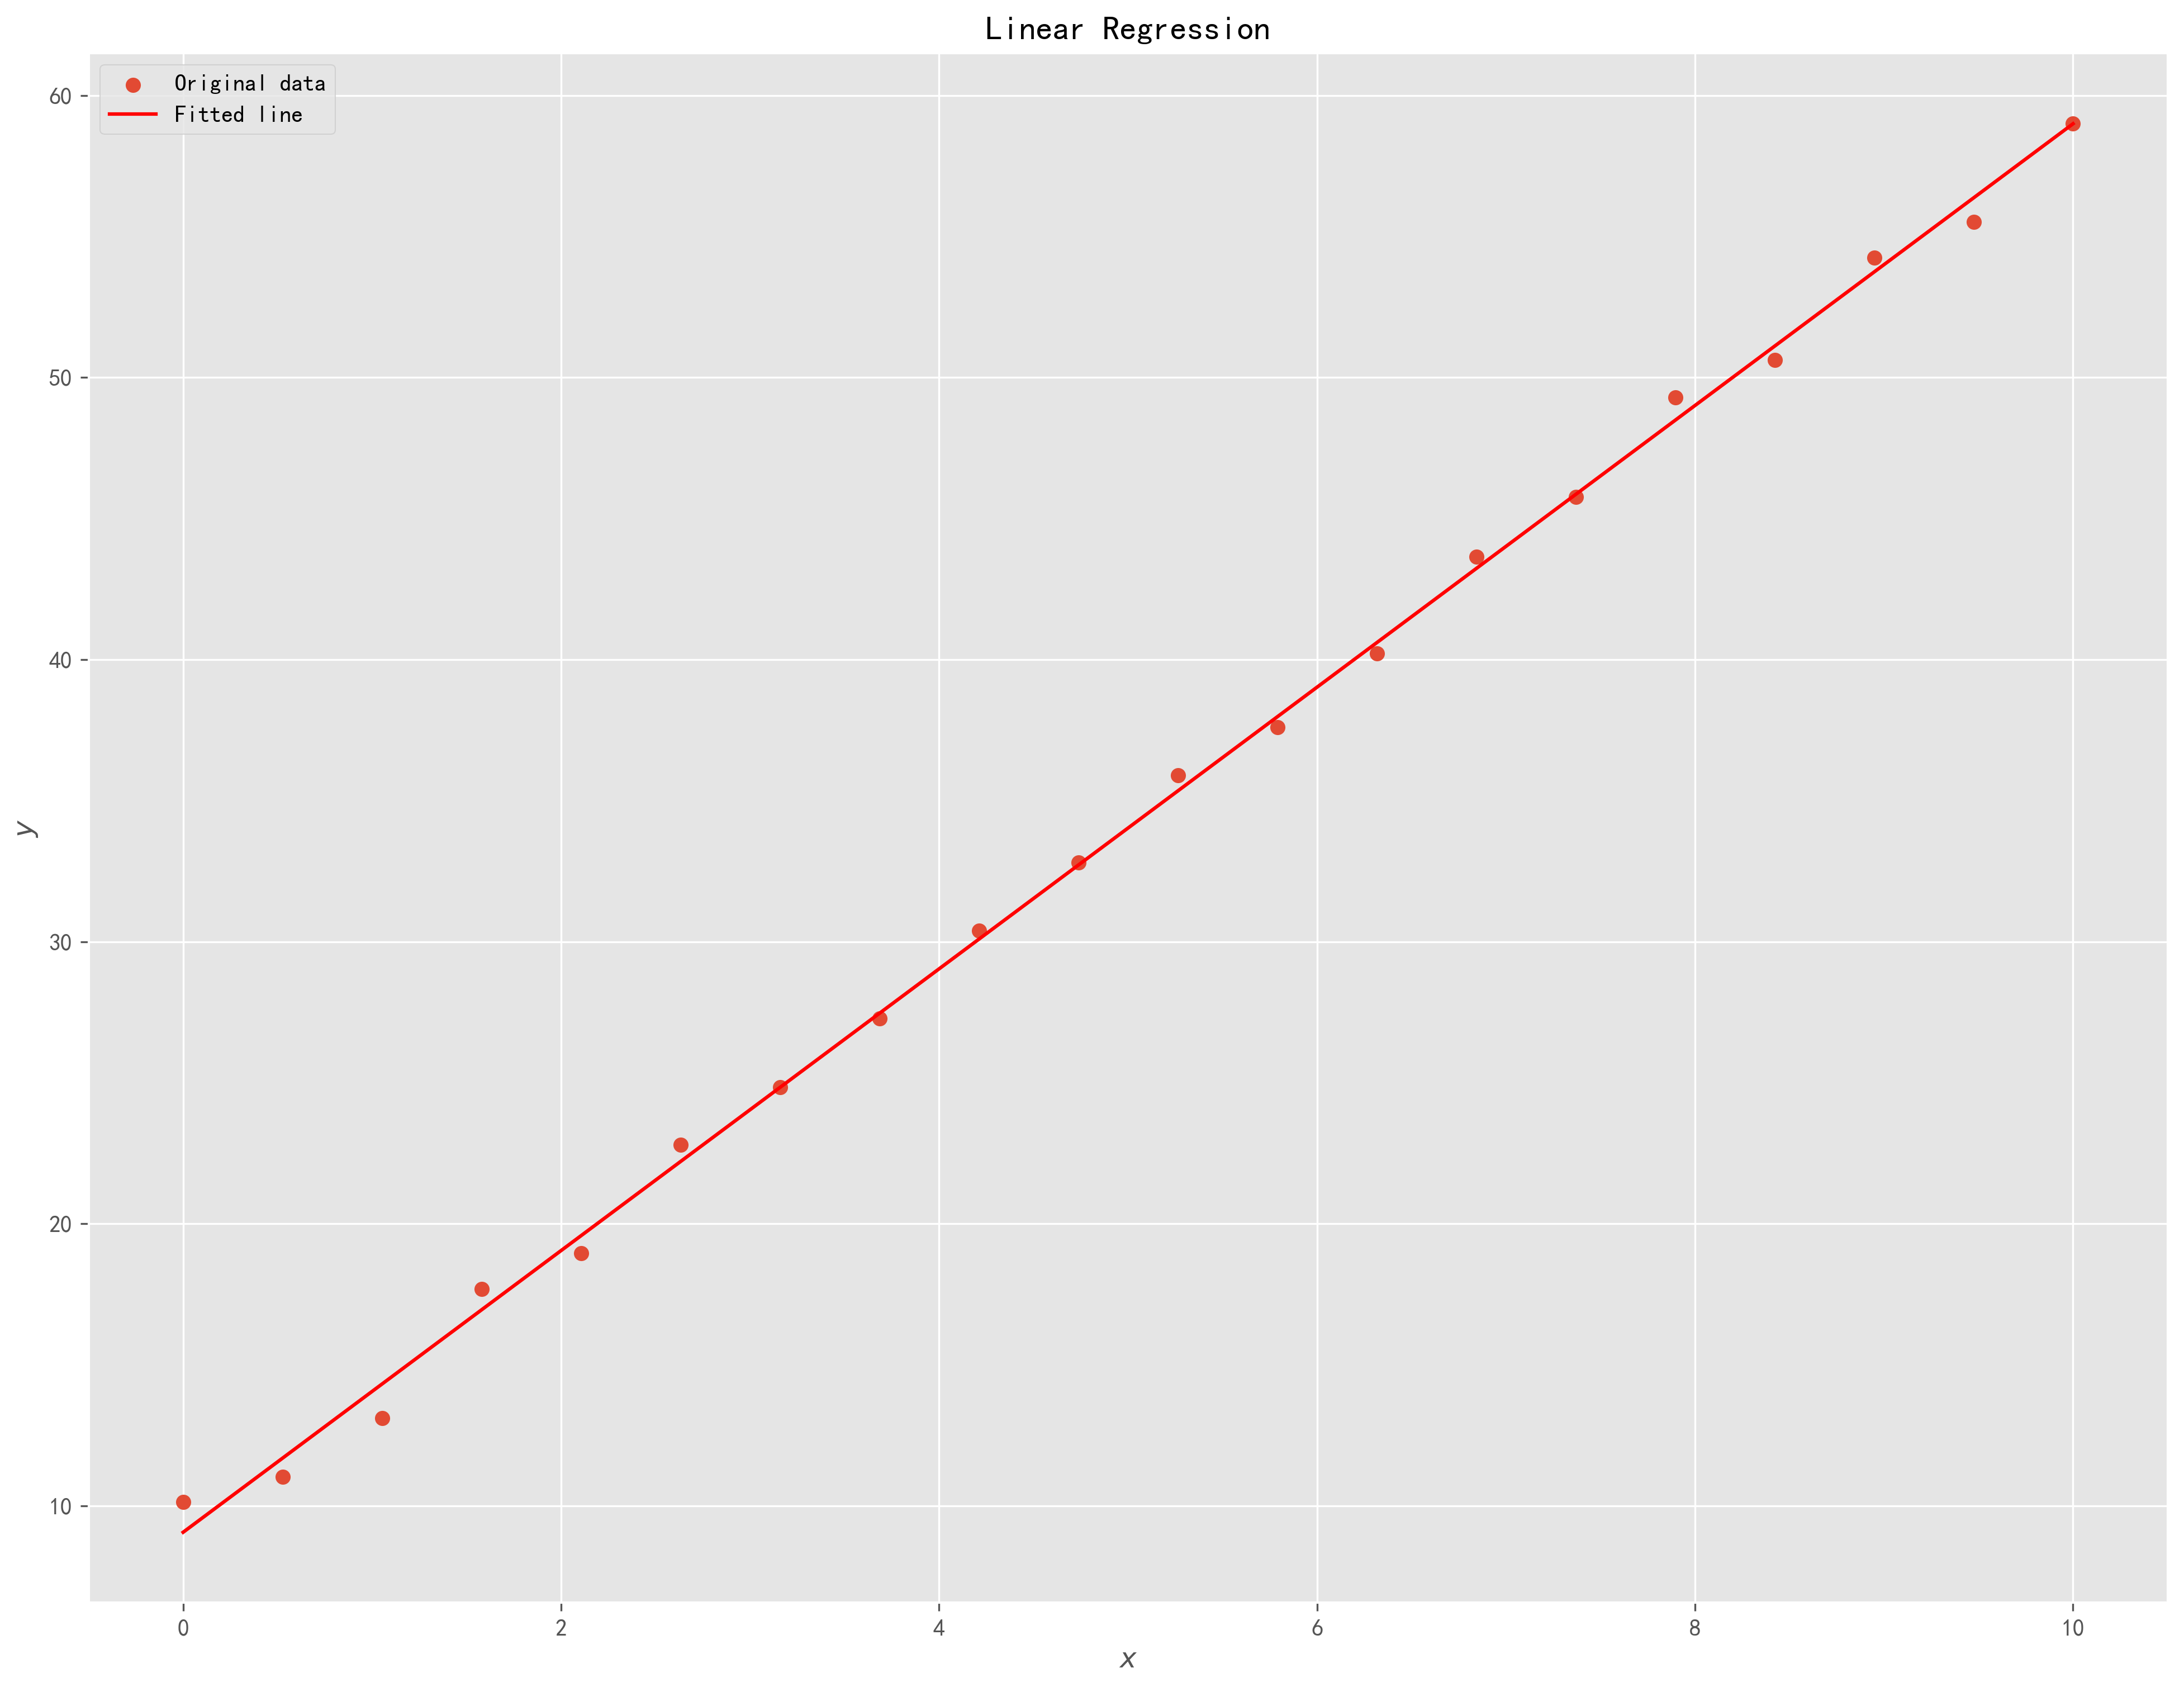

Weight: 4.9933
Bias: 9.0633

[2024-09-10 =37=2= 15:03:25] : GetThere


In [2]:
import time
import torch as tch
from torch import nn
from torch import optim
#
import matplotlib.pyplot as plt


def get_time(): return time.strftime("\n[%C%y-%m-%d =%W=%w= %H:%M:%S]", time.localtime())
def ready(txt=''): print(get_time() + f' {txt}: Ready2Go')
def done(txt=''):  print(get_time() + f' {txt}: GetThere')
#


# 生成模拟数据
w = tch.randint(low=-10, high=11, size=(1,)).item()
b = tch.randint(low=-10, high=11, size=(1,)).item()
print(f'the line is {w}x + {b}')
nnn = 20
x = tch.linspace(0, 10, nnn)
y = w * x + b + tch.randn(nnn) * 0.5  # y = 2x + 1 加上一些随机噪声
print(f'{x}: {x.shape}')
print(f'{y}: {y.shape}')

# 将数据转换为二维张量(因为torch网络层期待的输入是二维的: 批次x样本)
x = x.view(-1, 1)
y = y.view(-1, 1)
print(f'{x}: {x.shape}')
print(f'{y}: {y.shape}')
done('data')


# 定义模型
class LinearRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1)  # 输入维度为1，输出维度为1
    
    def forward(self, x):
        return self.linear(x)

model = LinearRegression()
done('model')


# 定义损失函数和优化器
criterion = nn.MSELoss()  # 均方误差损失
optimizer = optim.SGD(model.parameters(), lr=0.01)  # 随机梯度下降优化器
done('optim')


# 训练
num_epochs = 1000
for epoch in range(num_epochs):
    # 前向传播
    outputs = model(x)
    loss = criterion(outputs, y)

    # 反向传播和优化
    optimizer.zero_grad() # 清除参数的梯度
    loss.backward() # 计算出参数梯度, 并累积到该参数现在已有的梯度值中(w和b对应的梯度项如下)
    # print(f'Weight grad: {model.linear.weight.grad.item():.4f}')
    # print(f'Bias grad: {model.linear.bias.grad.item():.4f}')
    optimizer.step() # 根据模型中存的梯度值, 更新模型(但不清除梯度值)

    # 打印提示信息
    if (epoch+1) % 100 == 0: print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
#
done('train')


with tch.no_grad(): predicted = model(x) # 不记录梯度(因为不会反传用到), 以节省计算资源, 提高计算效率

plt.scatter(x.numpy(), y.numpy(), label='Original data') # torch张量不能直接送去画图
plt.plot(x.numpy(), predicted.numpy(), color='red', label='Fitted line')
plt.legend()
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Linear Regression')
plt.show()

print(f'Weight: {model.linear.weight.item():.4f}')
print(f'Bias: {model.linear.bias.item():.4f}')


done()

### 高维线性拟合


[2024-09-10 =37=2= 15:03:25] data: GetThere

[2024-09-10 =37=2= 15:03:25] model: GetThere

[2024-09-10 =37=2= 15:03:25] optim: GetThere
Epoch [100/1000], Loss: 0.1273
Epoch [200/1000], Loss: 0.0963
Epoch [300/1000], Loss: 0.0958
Epoch [400/1000], Loss: 0.0958
Epoch [500/1000], Loss: 0.0958
Epoch [600/1000], Loss: 0.0958
Epoch [700/1000], Loss: 0.0958
Epoch [800/1000], Loss: 0.0958
Epoch [900/1000], Loss: 0.0958
Epoch [1000/1000], Loss: 0.0958

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.




[2024-09-10 =37=2= 15:03:26] train: GetThere

真实参数 vs. 预测参数:
Weight 1: True = 0.3367, Predicted = 0.3417
Weight 2: True = 0.1288, Predicted = 0.1156
Weight 3: True = 0.2345, Predicted = 0.2361
Weight 4: True = 0.2303, Predicted = 0.2317
Weight 5: True = -1.1229, Predicted = -1.1175
Bias: True = -0.1863, Predicted = -0.1723


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


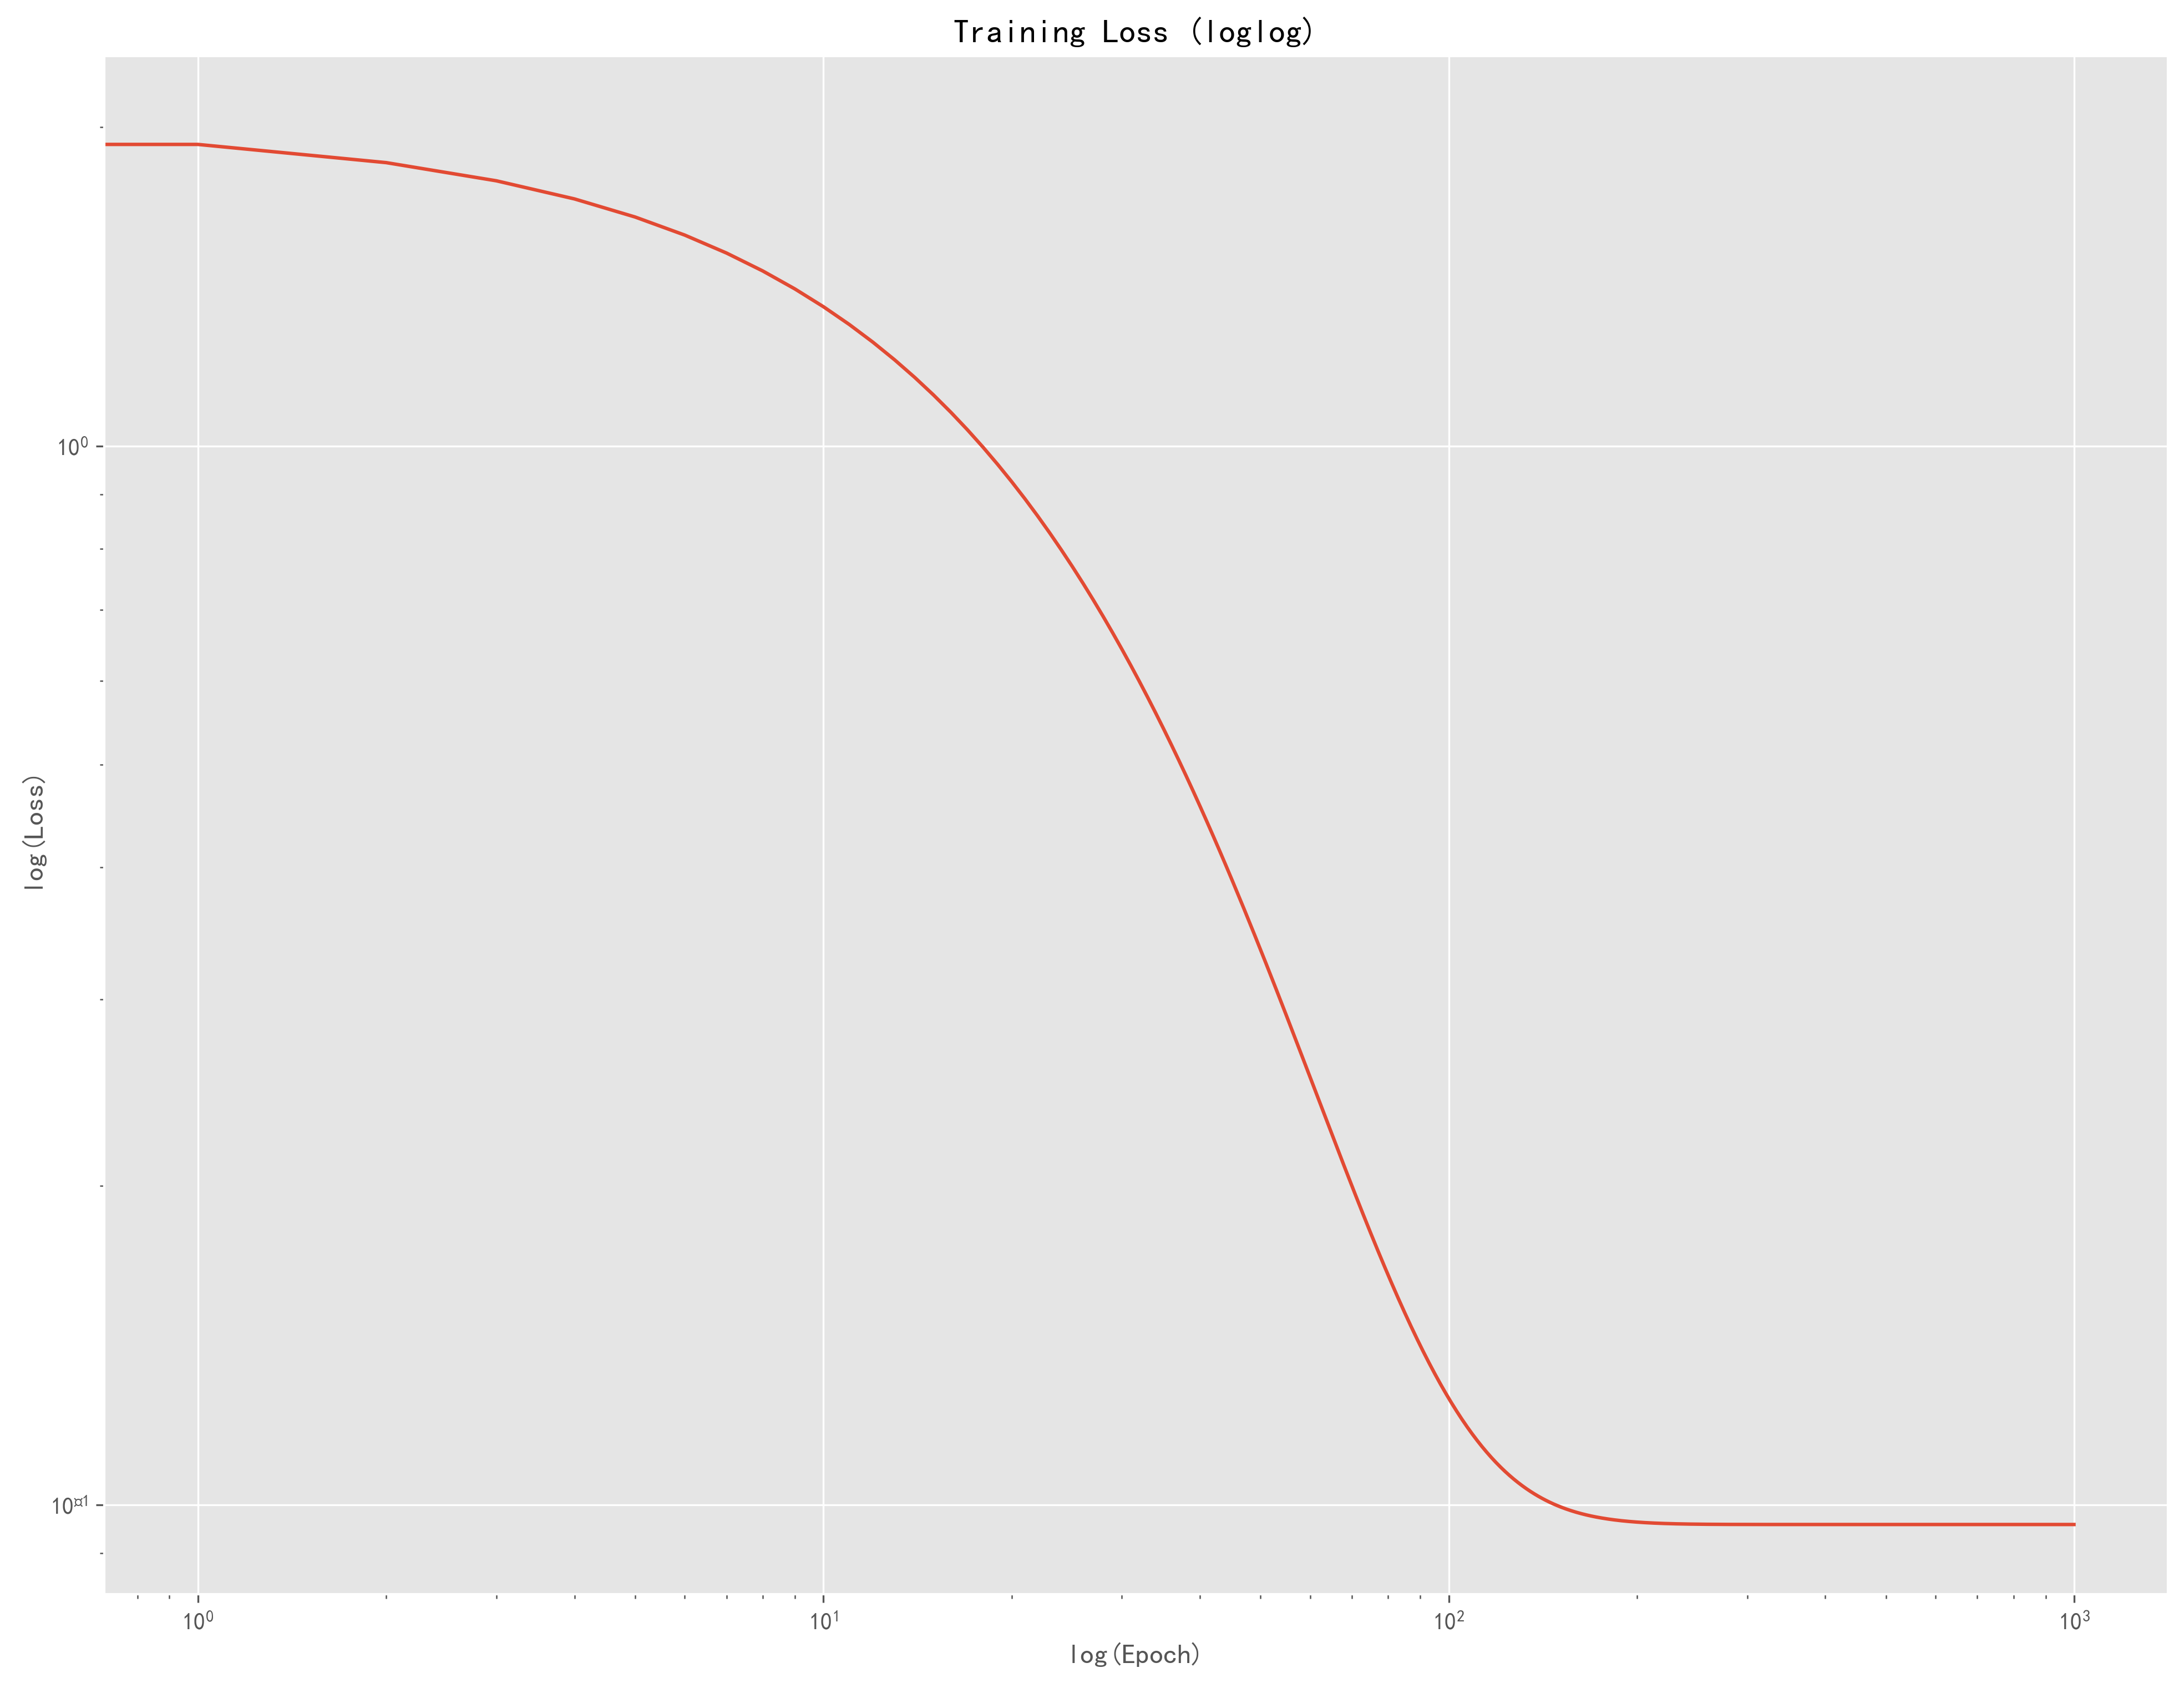


测试集上的 MSE: 0.0005


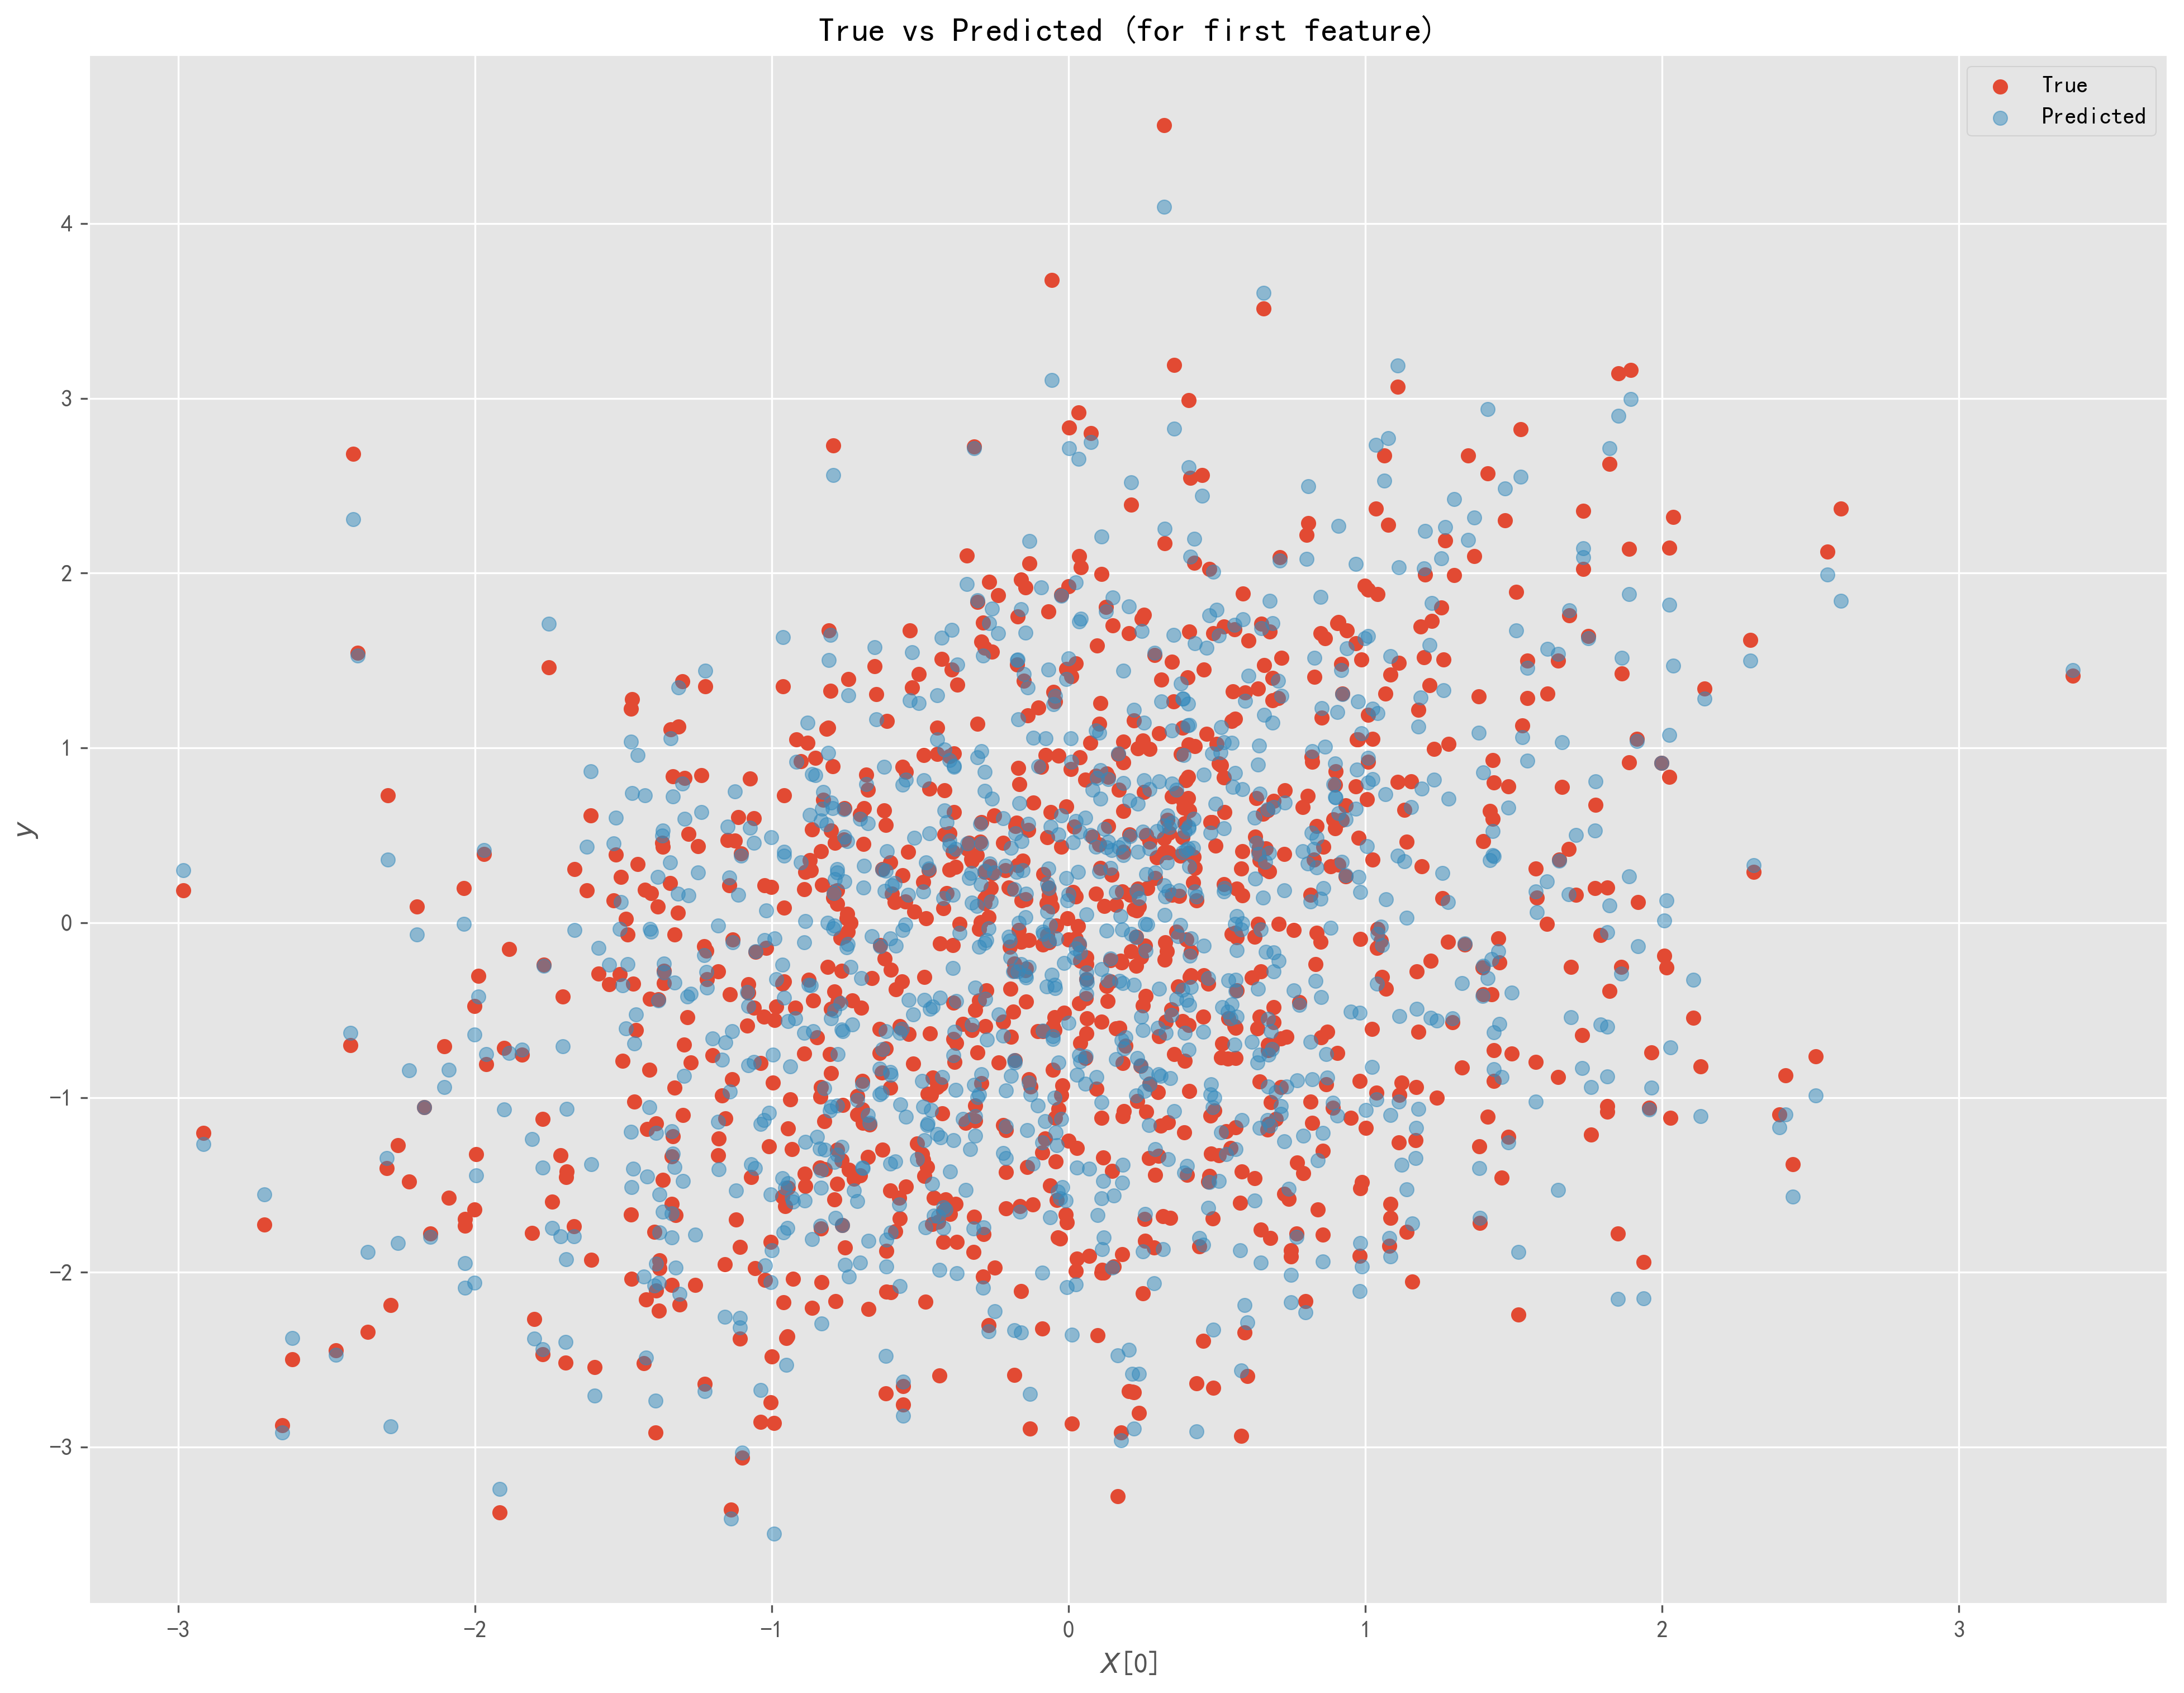


[2024-09-10 =37=2= 15:03:27] : GetThere


In [3]:
import time
import torch as tch
from torch import nn
from torch import optim
#
import matplotlib.pyplot as plt

def get_time(): return time.strftime("\n[%C%y-%m-%d =%W=%w= %H:%M:%S]", time.localtime())
def ready(txt=''): print(get_time() + f' {txt}: Ready2Go')
def done(txt=''):  print(get_time() + f' {txt}: GetThere')
#


# 设置随机种子以确保结果可复现
tch.manual_seed(42)

# 生成模拟数据
num_samples = 1000 # 样本数量
num_features = 5  # 每个样本的特征数量

# 真实参数
true_weights = tch.randn(num_features, 1)
true_bias = tch.randn(1)

# 生成输入数据
X = tch.randn(num_samples, num_features)

# 生成目标值（加上一些噪声）
y = X @ true_weights + true_bias + tch.randn(num_samples, 1) * 0.3
done('data')


# 定义模型
class MultiLinearRegression(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.linear = nn.Linear(input_dim, 1)
    
    def forward(self, x):
        return self.linear(x)

# 创建模型实例
model = MultiLinearRegression(num_features)
done('model')


# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
done('optim')


# 训练模型
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    # 前向传播
    outputs = model(X)
    loss = criterion(outputs, y)

    # 反向传播和优化
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 记录损失, 打印进度
    losses.append(loss.item())
    if (epoch + 1) % 100 == 0: print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

done('train')


# 打印结果
print("\n真实参数 vs. 预测参数:")
for i in range(num_features):
    print(f"Weight {i+1}: True = {true_weights[i].item():.4f}, Predicted = {model.linear.weight[0, i].item():.4f}")
print(f"Bias: True = {true_bias.item():.4f}, Predicted = {model.linear.bias.item():.4f}")

# 绘制损失曲线
plt.loglog(losses)
plt.title('Training Loss (loglog)')
plt.xlabel('log(Epoch)')
plt.ylabel('log(Loss)')
plt.show()

# 评估模型
model.eval()
with tch.no_grad():
    test_X = tch.randn(100, num_features)
    true_y = test_X @ true_weights + true_bias
    pred_y = model(test_X)
    test_loss = criterion(pred_y, true_y)
    print(f"\n测试集上的 MSE: {test_loss.item():.4f}")


# 可视化预测 vs 真实值 (对于第一个特征)
plt.scatter(X[:, 0], y, label='True')
plt.scatter(X[:, 0], model(X).detach(), label='Predicted', alpha=0.5)
plt.legend()
plt.title('True vs Predicted (for first feature)')
plt.xlabel('$X$[0]')
plt.ylabel('$y$')
plt.show()

done()

### MNIST手写数字识别(CNN)

In [5]:
import torch, time
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

def get_time(): return time.strftime("\n[%C%y-%m-%d =%W=%w= %H:%M:%S]", time.localtime())
def ready(txt=''): print(get_time() + f' {txt}: Ready2Go')
def done(txt=''):  print(get_time() + f' {txt}: GetThere')
#

# 检查是否有可用的 GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 定义超参数
batch_size = 64  # 每次向模型馈入多少样本
num_epochs = 2  # 训练的轮数, 为了演示(快)
learning_rate = 0.001

# 数据预处理和加载
transform = transforms.Compose([
    transforms.ToTensor(), # 转换为张量
    transforms.Normalize((0.1307,), (0.3081,)) # 标准化
])

# 设置数据集, 和数据加载器
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
done('data')


# 定义增强版 CNN 模型
class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        self.conv1 = nn.Conv2d(  1,  32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d( 32, 128, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2) # pool没有需学习的参数, 只有预定义的操作
        self.fc1 = nn.Linear(128 * 3 * 3, 256)  # 调整全连接层的输入大小
        self.fc2 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5)  # 添加 dropout 以减少过拟合

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x_ = x # 建立指针, 为了skip连接
        x = torch.relu(self.conv3(x))
        x = self.pool(x_ + x)  # skip连接+卷积层3
        x = x.view(-1, 128 * 3 * 3) # batch_size=x.size(0), channel_num=x.size(1), x_dim=x.size(2), y_dim=x.size(3)
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)  # 在全连接层之后应用 dropout
        x = self.fc2(x)
        return x

'''
具体的,
   - 输入图像：MNIST 图像大小为 28x28，所以初始形状是 `[batch_size, 1, 28, 28]`   
   - 经过第一个卷积和池化：
     * 卷积不改变空间维度（因为 padding=1）, 而通道数改为32
     * 池化将空间维度减半, 于是
     * 形状变为 `[batch_size, 32, 14, 14]`
   
   - 经过第二个卷积和池化：
     * 形状变为 `[batch_size, 64, 7, 7]`
   
   - 经过第三个卷积和池化：
     * 形状变为 `[batch_size, 128, 3, 3]`
'''
done('model')


# 初始化模型、损失函数和优化器
model = EnhancedCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 训练模型
total_step = len(train_loader)
for epoch in range(num_epochs):
    model.train()  # 确保模型处于训练模式
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 500 == 0: print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')
#
done('train')


# 测试模型
model.eval()  # 将模型设置为评估模式
torch.set_grad_enabled(False) # 替换了`with torch.no_grad():`方式, 不增加缩进级别
correct = 0
total = 0
for images, labels in test_loader:
    images = images.to(device)
    labels = labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f'测试集上的准确率: {100 * correct / total:.2f}%')
torch.set_grad_enabled(True) # !!!
done('eval')


# 保存模型
torch.save(model.state_dict(), 'mnist_enhanced_cnn.pth')


[2024-09-10 =37=2= 15:31:10] data: GetThere

[2024-09-10 =37=2= 15:31:10] model: GetThere
Epoch [1/2], Step [500/938], Loss: 0.0767
Epoch [2/2], Step [500/938], Loss: 0.0621

[2024-09-10 =37=2= 15:35:54] train: GetThere
测试集上的准确率: 99.07%

[2024-09-10 =37=2= 15:36:06] eval: GetThere


### 时间序列预测示例(GRU, 单步)


[2024-09-10 =37=2= 17:42:13] data: GetThere

[2024-09-10 =37=2= 17:42:13] model: GetThere
Epoch [100/1000], Loss: 0.0156
Epoch [200/1000], Loss: 0.0143
Epoch [300/1000], Loss: 0.0135
Epoch [400/1000], Loss: 0.0130
Epoch [500/1000], Loss: 0.0126
Epoch [600/1000], Loss: 0.0123
Epoch [700/1000], Loss: 0.0122
Epoch [800/1000], Loss: 0.0121
Epoch [900/1000], Loss: 0.0120
Epoch [1000/1000], Loss: 0.0120

[2024-09-10 =37=2= 17:44:56] train: GetThere
Test Loss: 0.0095


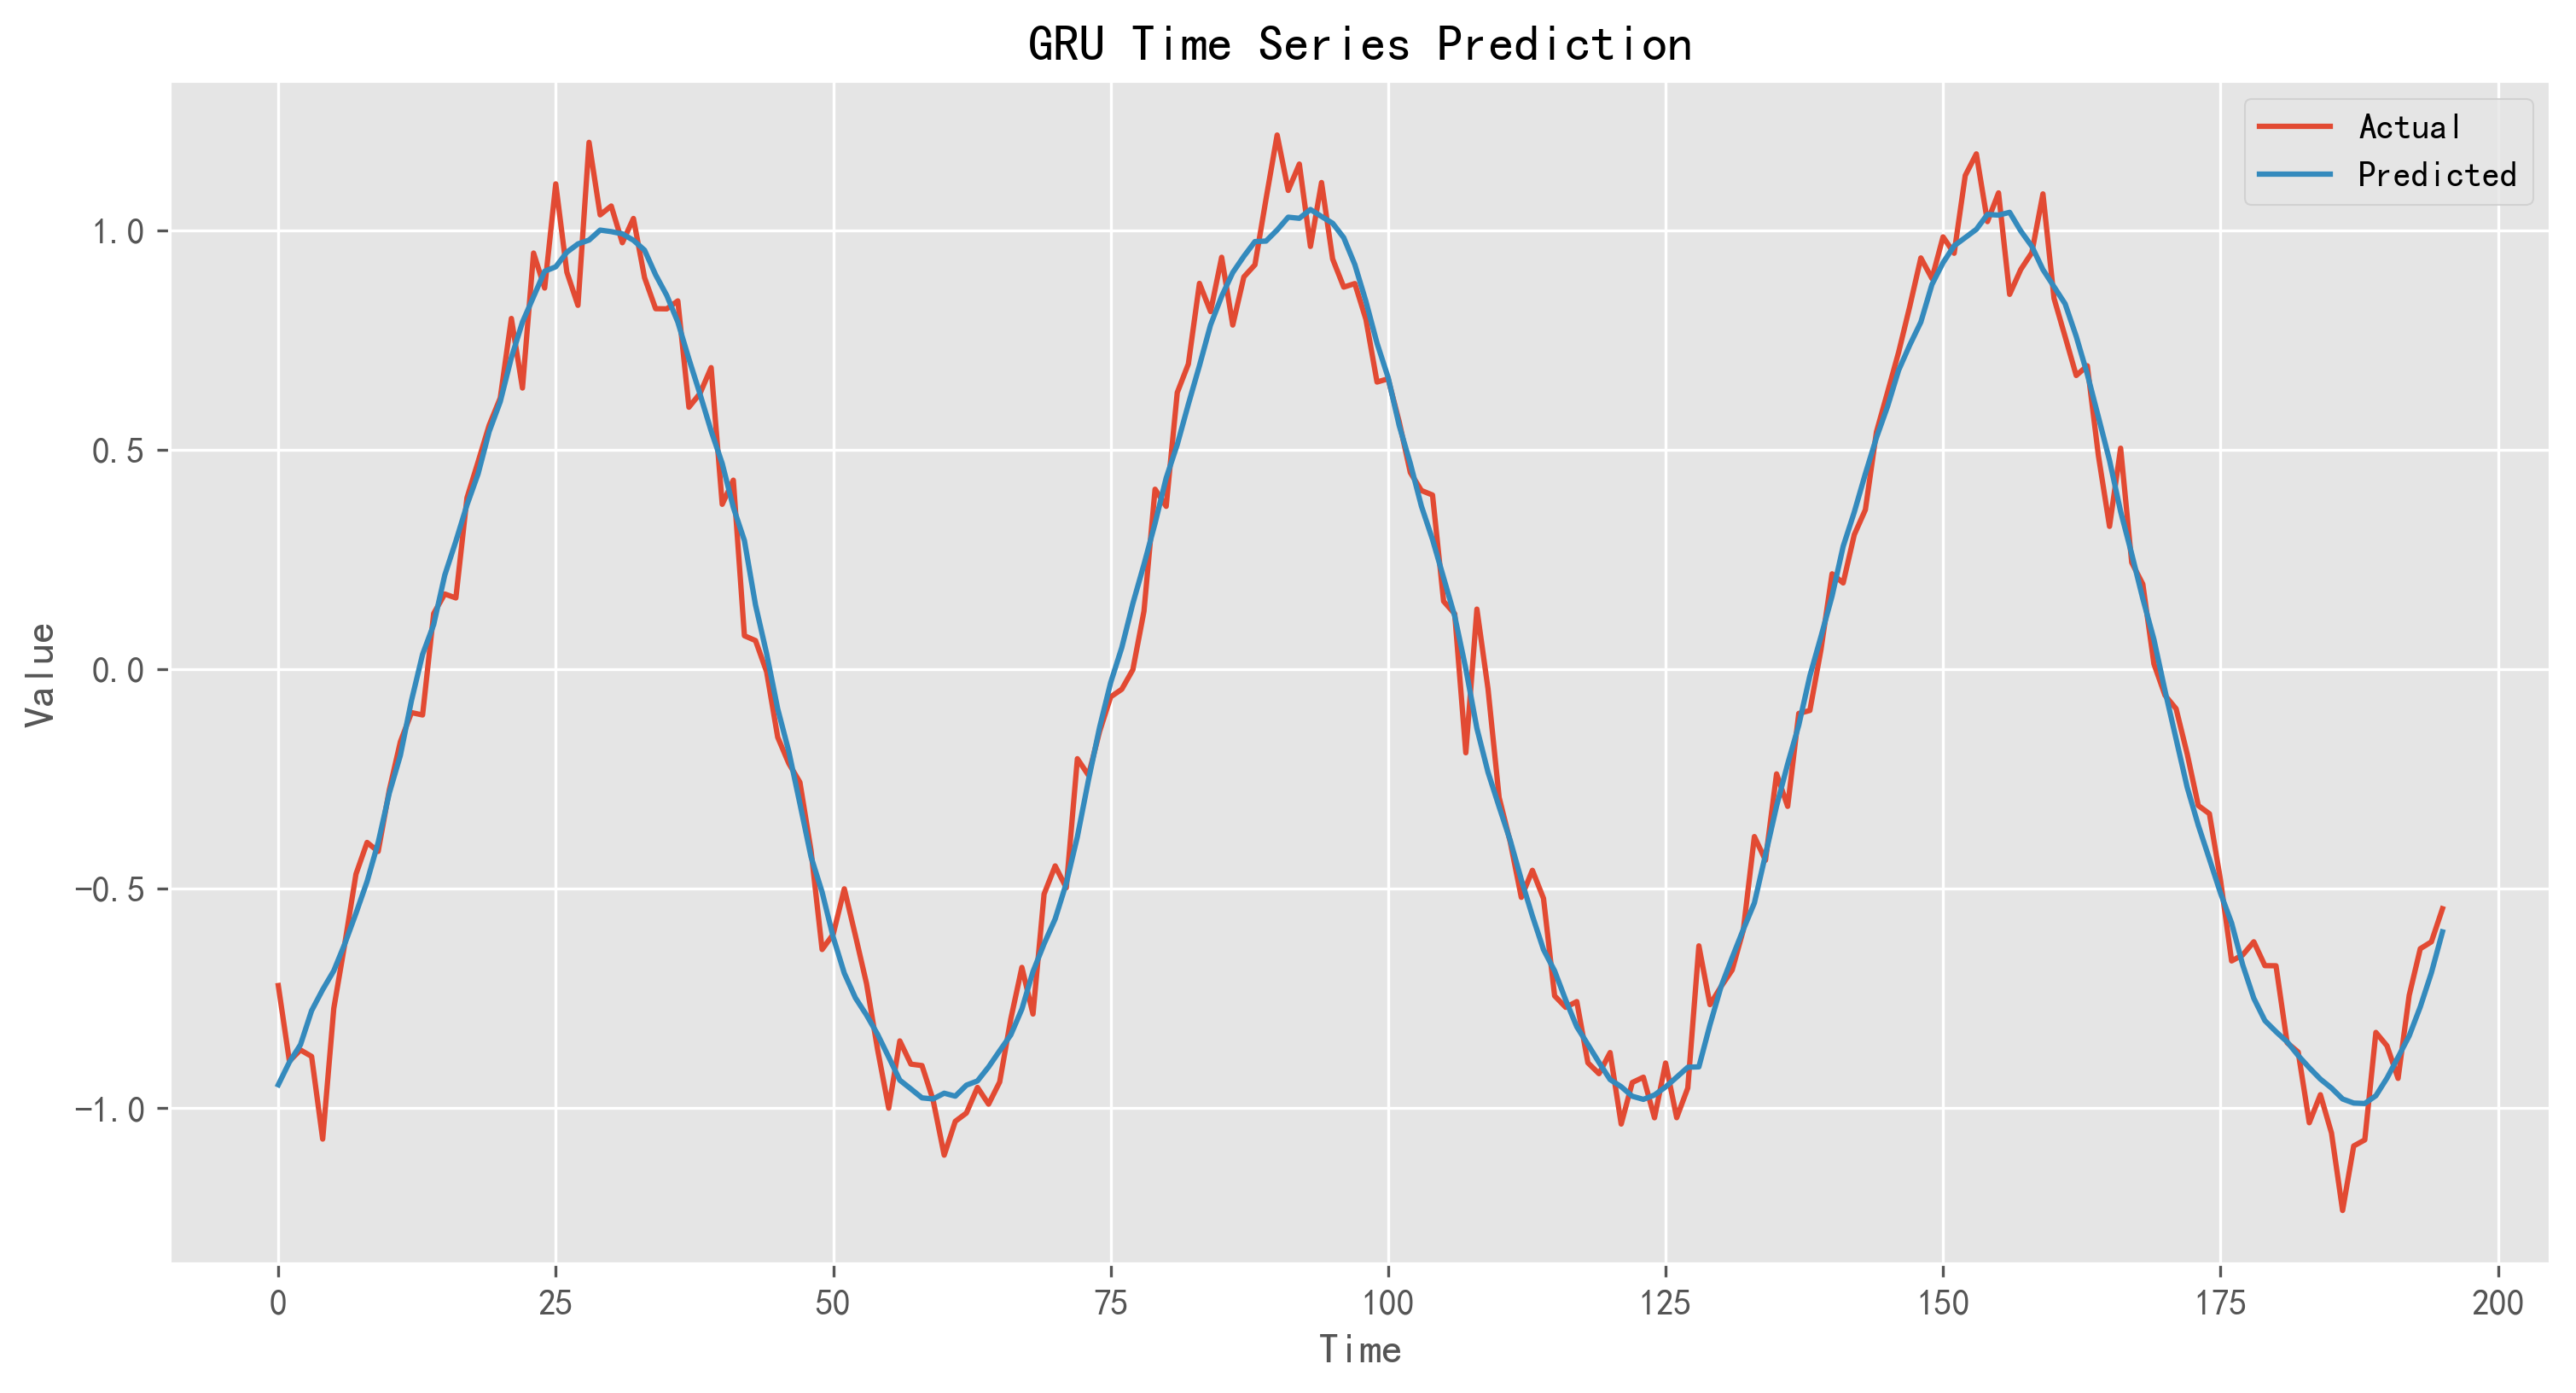


[2024-09-10 =37=2= 17:44:57] : GetThere


In [2]:
import torch, time
import numpy as np
from torch import nn
from torch import optim
import matplotlib.pyplot as plt

def get_time(): return time.strftime("\n[%C%y-%m-%d =%W=%w= %H:%M:%S]", time.localtime())
def ready(txt=''): print(get_time() + f' {txt}: Ready2Go')
def done(txt=''):  print(get_time() + f' {txt}: GetThere')
#

# 设置随机种子以确保结果可重现
seed = 137
torch.manual_seed(seed)
np.random.seed(seed)


# 生成模拟的时间序列数据(生成一个长数据)
def generate_time_series(num_points):
    time = np.arange(num_points)
    series = np.sin(0.1 * time) + np.random.randn(num_points) * 0.1
    return series

# 准备数据(在长数据上滑动, 以便预测时用)
def prepare_data(series, seq_length):
    X, y = [], []
    for i in range(len(series) - seq_length):
        X.append(series[i:i+seq_length])
        y.append(series[i+seq_length])
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32) # np默认64b, torch默认32bit

done('data')


# 定义 GRU 模型
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True) # 可以设置双向
        # batch first: (batch, seq, feature)(对数据处理明显更友好); 默认: (seq, batch, feature)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # 初始化隐藏状态
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        '''
        - 形为 (num_layers, batch_size, hidden_size) 的 3D 张量。
        - 每一层 GRU 都有自己的初始隐藏状态，对批次中的每个样本都有一个隐藏状态向量。
        '''
        # 前向传播 GRU, 一条平淡无奇的语句自动完成了(对序列)循环的过程!(包括多层处理)!!!
        out, hn = self.gru(x, h0) # 输出序列, 和最后一个时间步的隐含状态
        '''
        - `out`: 包含每个时间步的输出，形状为 (batch_size, sequence_length, hidden_size)
          + 如果我们想要平均所有时间步的输出，我们可以轻松地修改为 `out.mean(dim=1)`。
        - `hn`: 只包含最后一个时间步的状态，形状为 (num_layers * num_directions, batch_size, hidden_size)
          + num_directions = 1 or 2, 表示单向或双向RNN.
        '''
        # 解码最后一个时间步的隐藏状态
        out = self.fc(out[:, -1, :])
        return out.squeeze(-1)

done('model')


# 设置超参数
input_size = 1
hidden_size = 32
output_size = 1
num_layers = 2  # GRU 的层数
seq_length = 20  # 序列长度
num_epochs = 1000  # 训练轮数
learning_rate = 0.001

# 生成数据
series = generate_time_series(1000)
X, y = prepare_data(series, seq_length)

# 划分训练集和测试集
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 转换为 PyTorch 张量
X_train = torch.as_tensor(X_train).unsqueeze(2)
'''
`unsqueeze` 用于在张量中添加一个新的维度。
   假设原始 `X_train` 形状是 (100, 20)，表示 100 个样本，每个样本有 20 个时间步：
   - 使用 `unsqueeze(2)` 后，形状变为 (100, 20, 1)
   - 现在它表示 100 个样本，每个样本有 20 个时间步，每个时间步有 1 个特征
   - 确保输入数据的维度与模型的期望相匹配是非常重要的, 不正确的维度会导致运行时错误或不期望的结果
   - 也可以使用 `X_train.reshape(X_train.shape[0], X_train.shape[1], 1)` 达到相同的效果
   - 或者使用 `X_train[:, :, None]` 也可以
   - 最后，这个操作是可逆的，可以使用 `squeeze()` 来移除大小为 1 的维度
'''
y_train = torch.as_tensor(y_train)
X_test = torch.as_tensor(X_test).unsqueeze(2)
y_test = torch.as_tensor(y_test)

# 初始化模型、损失函数和优化器
model = GRUModel(input_size, hidden_size, output_size, num_layers)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 训练模型
for epoch in range(num_epochs):
    model.train() # train mode
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()    
    if (epoch + 1) % 100 == 0: print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

done('train')


# 测试模型
model.eval() # eval mode
torch.set_grad_enabled(False)
test_outputs = model(X_test)
test_loss = criterion(test_outputs, y_test)
print(f'Test Loss: {test_loss.item():.4f}')
torch.set_grad_enabled(True)


# 可视化结果
plt.figure(figsize=(12, 6))
plt.plot(y_test.numpy(), label='Actual')
plt.plot(test_outputs.numpy(), label='Predicted')
plt.legend()
plt.title('GRU Time Series Prediction')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

done()

### 时间序列预测示例(GRU, 多步)


[2024-09-10 =37=2= 17:23:54] data: GetThere

[2024-09-10 =37=2= 17:23:54] model: GetThere
Epoch [100/1000], Loss: 0.0177
Epoch [200/1000], Loss: 0.0132
Epoch [300/1000], Loss: 0.0115
Epoch [400/1000], Loss: 0.0110
Epoch [500/1000], Loss: 0.0108
Epoch [600/1000], Loss: 0.0107
Epoch [700/1000], Loss: 0.0106
Epoch [800/1000], Loss: 0.0111
Epoch [900/1000], Loss: 0.0105
Epoch [1000/1000], Loss: 0.0104

[2024-09-10 =37=2= 17:42:11] train: GetThere
Test Loss: 0.0103


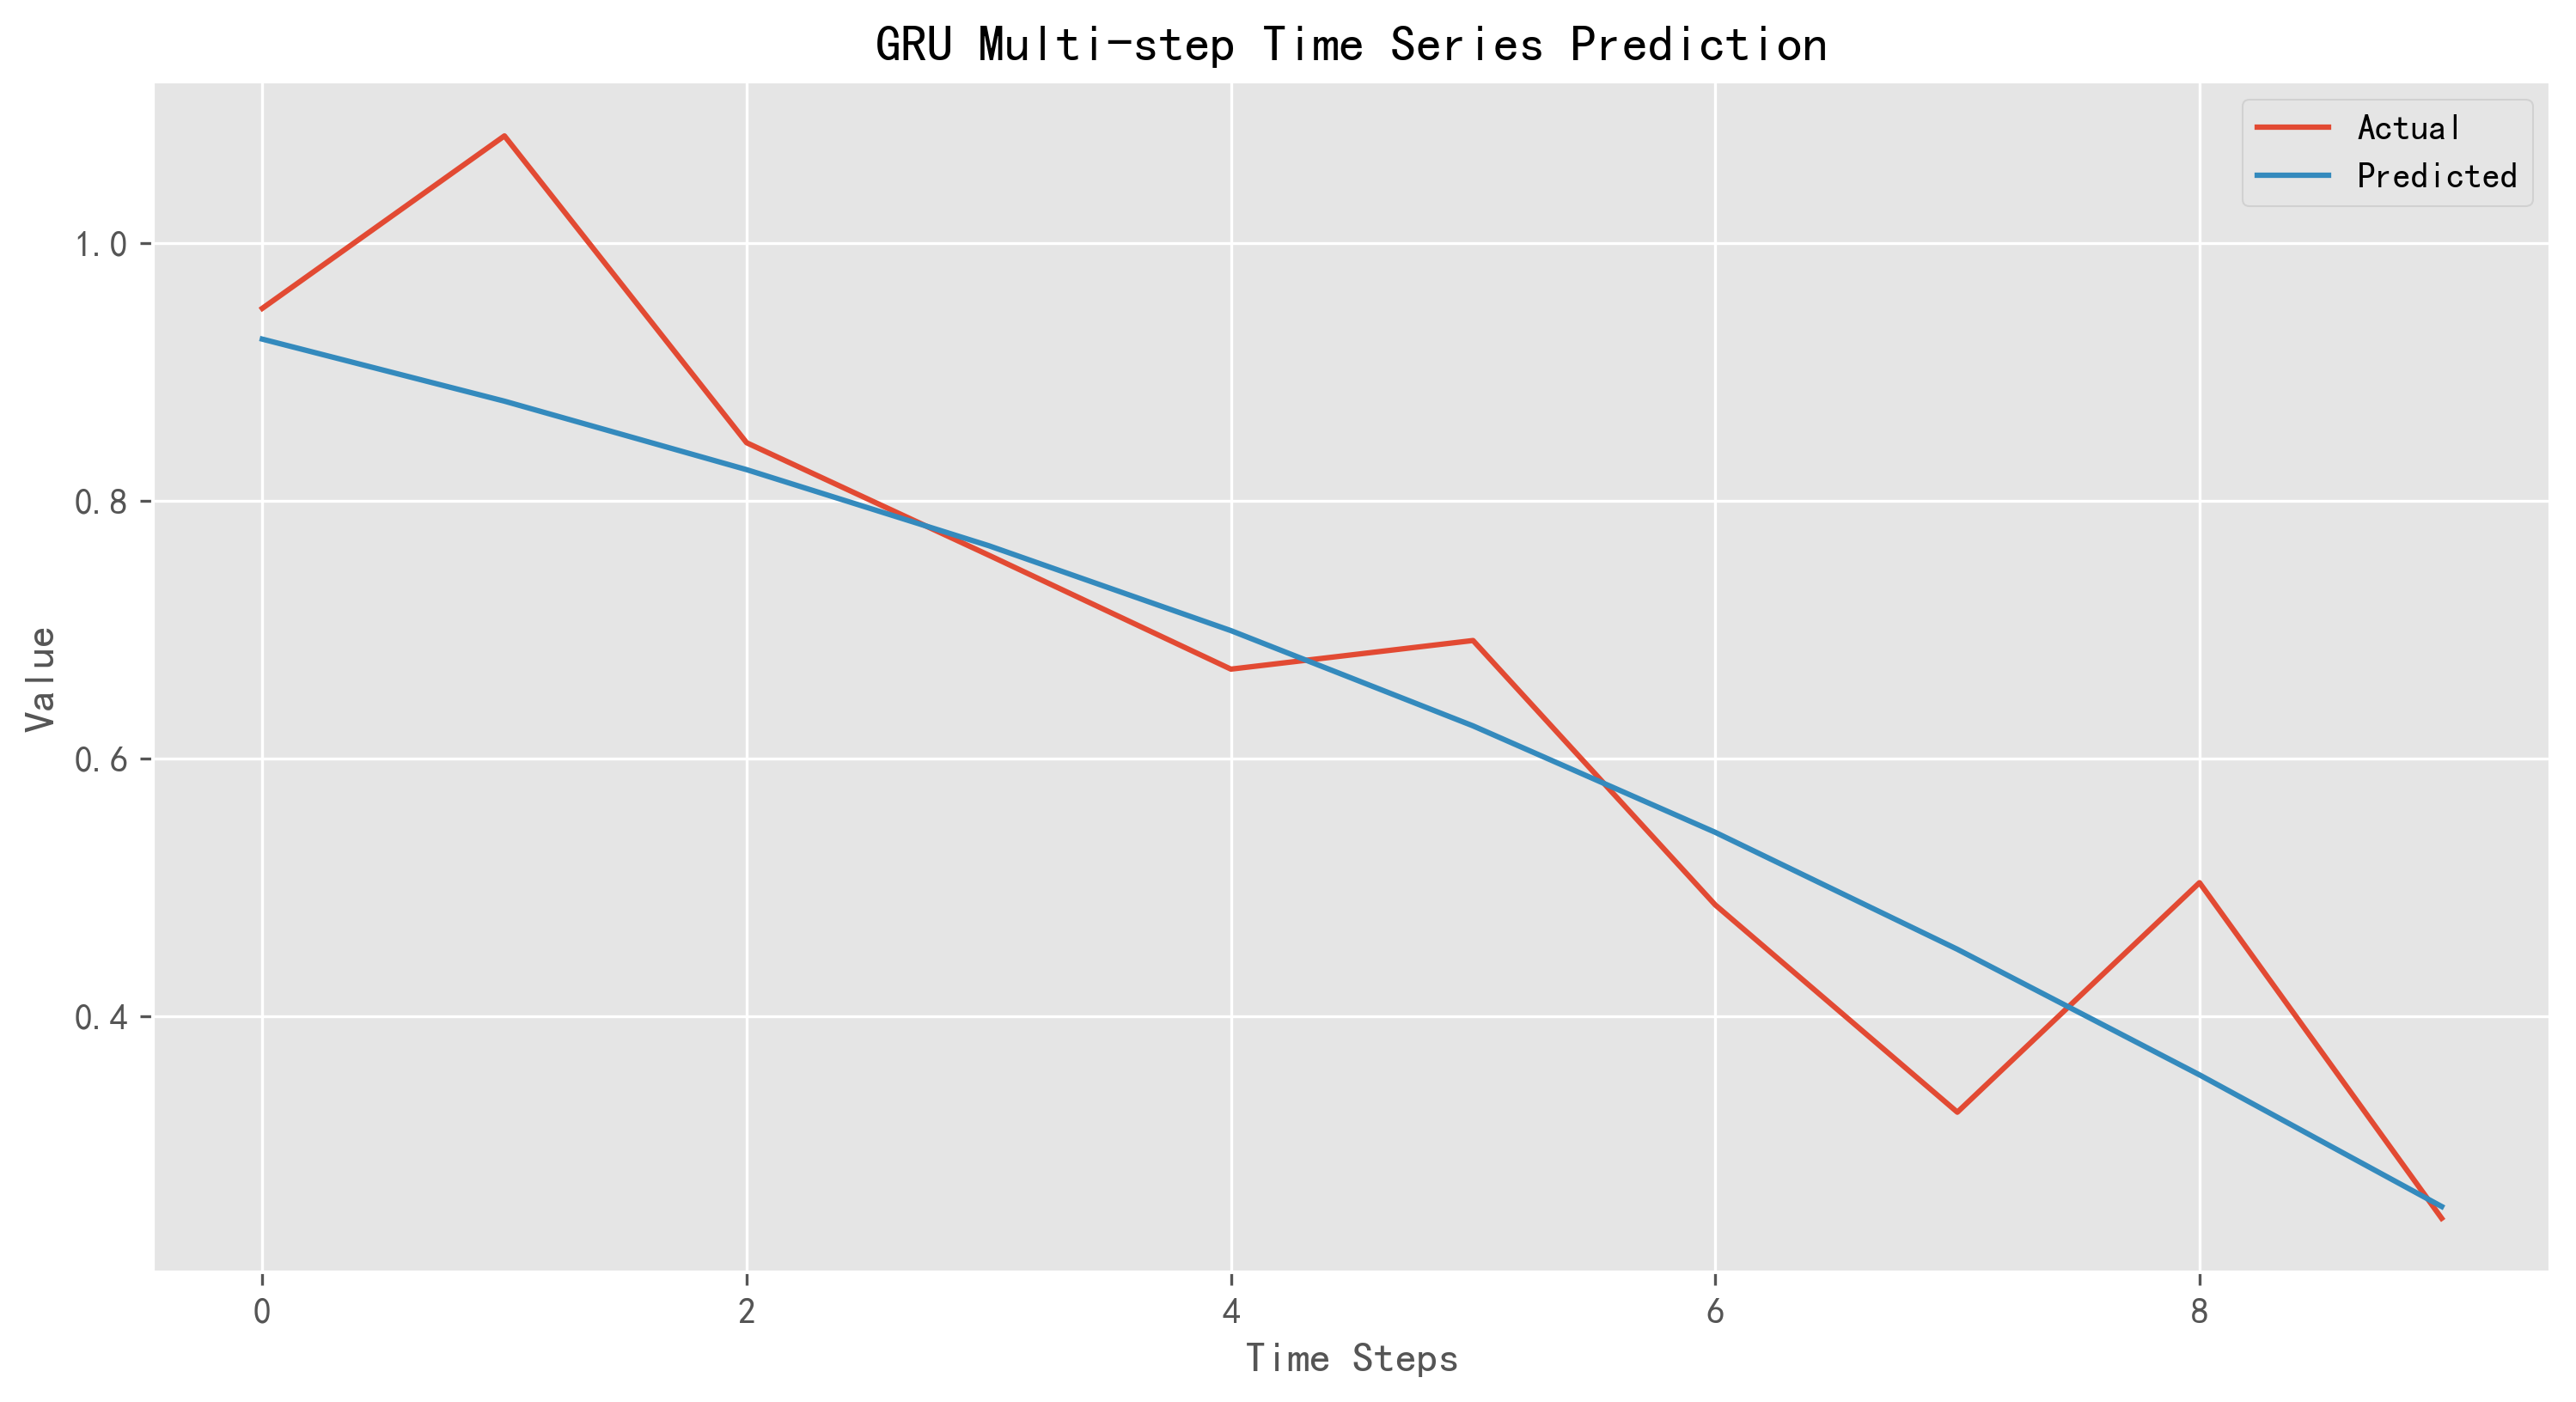

In [1]:
import torch, time
import numpy as np
from torch import nn
from torch import optim
import matplotlib.pyplot as plt

def get_time(): return time.strftime("\n[%C%y-%m-%d =%W=%w= %H:%M:%S]", time.localtime())
def ready(txt=''): print(get_time() + f' {txt}: Ready2Go')
def done(txt=''):  print(get_time() + f' {txt}: GetThere')

# 设置随机种子以确保结果可重现
seed = 137
torch.manual_seed(seed)
np.random.seed(seed)

# 生成模拟的时间序列数据
def generate_time_series(num_points):
    time = np.arange(num_points)
    series = np.sin(0.1 * time) + np.random.randn(num_points) * 0.1
    return series

# 准备数据（修改以支持多步预测）
def prepare_data(series, seq_length, pred_length):
    X, y = [], []
    for i in range(len(series) - seq_length - pred_length + 1):
        X.append(series[i:i+seq_length])
        y.append(series[i+seq_length:i+seq_length+pred_length])
    return np.array(X, dtype=np.float32), np.array(y, dtype=np.float32)

done('data')


# 定义 GRU 模型（修改以支持多步预测）
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=1, pred_length=1):
        super(GRUModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.pred_length = pred_length
        
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)


    def forward(self, x):
        batch_size = x.size(0)
        h0 = torch.zeros(self.num_layers, batch_size, self.hidden_size).to(x.device)
        out, hidden = self.gru(x, h0)
        
        # 使用最后一个时间步的隐藏状态进行多步预测
        predictions = []
        last_hidden = out[:, -1, :]
        for _ in range(self.pred_length):
            out = self.fc(hidden[-1])
            # output = self.fc(last_hidden)
            predictions.append(out)
            # 使用预测结果作为下一步的输入
            _, hidden = self.gru(out.unsqueeze(1), hidden) # [0].squeeze(0) # 形状匹配也是个大问题
        
        return torch.stack(predictions, dim=1).squeeze(-1)

done('model')


# 设置超参数
input_size = 1
hidden_size = 64
output_size = 1
num_layers = 2
seq_length = 50
pred_length = 10  # 预测未来的步数
num_epochs = 1000
learning_rate = 0.001


# 生成数据
series = generate_time_series(1200)
X, y = prepare_data(series, seq_length, pred_length)

# 划分训练集和测试集
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# 转换为 PyTorch 张量
X_train = torch.as_tensor(X_train).unsqueeze(2)
y_train = torch.as_tensor(y_train)
X_test = torch.as_tensor(X_test).unsqueeze(2)
y_test = torch.as_tensor(y_test)


# 初始化模型、损失函数和优化器
model = GRUModel(input_size, hidden_size, output_size, num_layers, pred_length)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# 训练模型
for epoch in range(num_epochs):
    model.train()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()    
    if (epoch + 1) % 100 == 0: print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

done('train')


# 测试模型
model.eval()
torch.set_grad_enabled(False)
test_outputs = model(X_test)
test_loss = criterion(test_outputs, y_test)
print(f'Test Loss: {test_loss.item():.4f}')
torch.set_grad_enabled(True)


# 可视化结果
plt.figure(figsize=(12, 6))
example_idx = 0  # 选择一个样本来可视化
plt.plot(y_test[example_idx].numpy(), label='Actual')
plt.plot(test_outputs[example_idx].numpy(), label='Predicted')
plt.legend()
plt.title('GRU Multi-step Time Series Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.show()